# Modellkomplexität

Bisher haben wir ausschließlich Modelle besprochen, für die der Ausgangspunkt der Prognose immer in Form der linearen Regressionsgerade gegeben war. Insbesondere für die lineare Regression scheint diese Annahme sehr restriktiv, da davon auszugehen ist, dass in der Realität die Zusammenhänge komplexer sein können. Als Beispiel sei noch einmel der Grenznutzen zusätzlicher Werbung und ihr Einfluss auf die Verkäufe einer Firma genannt. Um komplexere Zusammenhänge abbilden zu können, gibt es verschiedene Möglichkeiten. Mit Blick auf die lineare Regression können die unabhängigen Variablen auf nicht-lineare Art transformiert werden. Wir werden uns dies im nächsten Abschnitt mit Hilfe polynomialen Regression ansehen. Jedoch existieren weitaus mehr Möglichkeiten oder auch Modellierungen als die polynomiale Regression. Weitere Beispiele sind durch die Verwendung von Splines bei der Regression oder durch andere Modelle wir Regression Trees oder Neuronale Netzwerke gegeben. 

Unabhängig von der Modellwahl ist es jedoch im Regelfall so, dass komplexere Modelle schwieriger zu trainieren sind. Während die Performance der Modelle für Trainingsdaten meist schnell steigt, kann es sein, dass gleichzeitig die Ergebnisse für die Testdaten schlechter werden. Dieses Phänomen wird Overfitting genannt und beschreibt die Tatsache, dass das Modell zu spezifisch an die Trainingsdaten angepasst wird, wodurch es weniger gut darin ist allgemeine Zusammenhänge zu identifizieren. Als Folge ist die Performance für neue Daten oft schlechter. Es kommt auch noch hinzu, dass die Variabilität von komplexeren Modellen oft größer ist. Dies bedeutet, dass sich die Vorhersagen deutlich stärker unterscheiden, wenn andere Daten einer Stichprobe entnommen und für das Training des Modells verwendet werden. Andererseits haben zu stark vereinfachende Modelle, wie beispielsweise das lineare Regressionsmodell, oft das Problem, dass sie den wahren Zusammenhang nicht abbilden können und daher die Prognose systematisch verzerrt sind. Hierbei spricht man von einem Bias, als einer systematischen Abweichung von den wahren Werten. Beim Trainieren von Modelle gilt es, einen guten Kompromiss zwischen diesen gegensätzlichen Effekten zu finden. Um dies näher betrachten zu können, benötigen wir zunächst die Möglichkeit auf ein komplexeres Modell zurückgreifen zu können. Als Beispiel soll hierfür die polynomiale Regression dienen, welche wir uns jetzt ansehen. 

## Flexiblere Modelle - Polynomiale Regression

Bei der polynomialen Regression werden lediglich zu den unabhängigen Variablen deren exponentierte Formen bis zum Grad $q$ in das lineare Regressionsmdoell mit aufgenommen. Das bedeutet für eine lineare Einfachregression wird das Regressionsmodell zu:

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + ... + \beta_q x^q + \epsilon =  \epsilon
$$

Die Grafik in der unteren Zelle veranschaulicht, dass auf diese Weise auch nicht-lineare Zusammenhänge abgebildet werden können. 

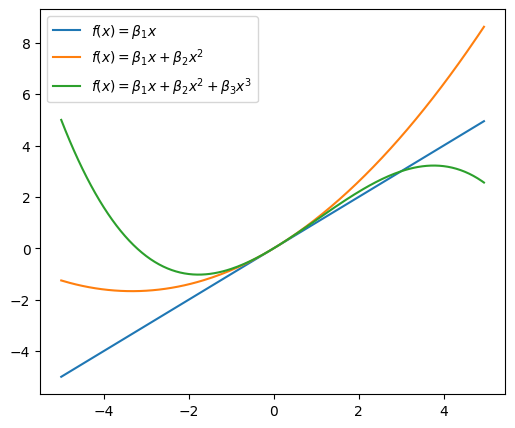

In [1]:
import numpy as np
import matplotlib.pylab as plt


x = np.arange(-5, 5, 0.05)
poly_one = lambda x: x
poly_two = lambda x: x + 0.15 * x**2
poly_three = lambda x: x + 0.15 * x**2 - 0.05*x**3

fig, ax = plt.subplots(figsize = (6, 5))
ax.plot(x, poly_one(x), label = r"$f(x) = \beta_1 x$")
ax.plot(x, poly_two(x), label = r"$f(x) = \beta_1 x + \beta_2 x^2$")
ax.plot(x, poly_three(x), label = r"$f(x) = \beta_1 x + \beta_2 x^2 + \beta_3 x^3$")
ax.legend()
plt.show()

Der Grad des Polynoms muss jedoch vom Nutzer spezifiziert werden und wenn wir mehrere unabhängige Variablen im Modell haben, deren Polynom bis zu einem bestimmten Grad mit in das Modell mit aufgenommen werden, erhöht sich sehr schnell die Anzahl der Variablen im Modell. Zudem ist es aus den oben genannten nicht immer gut, die Komplexität des Modells zu sehr durch die Aufnahme von Polynome hohen Grades zu erhöhen. Für ein besseres Verständnis betrachten wir ein einfaches und künstlich erzeugtes Beispiel. 

Wir gehen davon aus, dass der wahre Zusammenhang zwischen $x$ und $y$ durch: 

$$
y = \cos(1.5 \pi x) + \epsilon
$$

spezifiziert ist. In der unteren Zelle können wir gut erkennen, dass ein lineares Modell nicht in der Lage sein wird, diesen Zusammenhang adäquat abzubilden.  

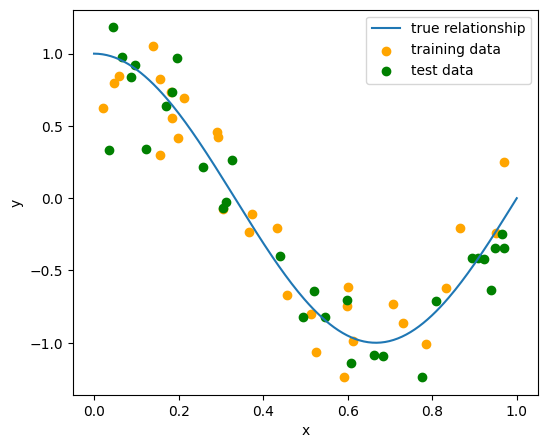

In [2]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error

# let us define a true functional relationship which is more complex than a simple linear relationship
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# generate some sample data
np.random.seed(42)

n_samples = 30

# these values are for plotting the function
X_range = np.linspace(0, 1, 200)
# some training and some test data samples
X_train = np.sort(np.random.rand(n_samples))
X_test = np.sort(np.random.rand(n_samples))
y_train = true_fun(X_train) + np.random.randn(n_samples) * 0.25
y_test = true_fun(X_test) + np.random.randn(n_samples) * 0.25

# visualize the relationship
fig, ax = plt.subplots(figsize = (6, 5))
ax.plot(X_range, true_fun(X_range), label = 'true relationship')
plt.scatter(X_train, y_train, label = 'training data', color = 'orange')
ax.scatter(X_test, y_test, label = 'test data', color = 'green')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.show()

Um den nicht-linearen Zusammenhang besser abbilden zu können, folgen wir den Ansatz der polynomialen Regression. Für den Vergleich schätzen wir das traditionelle lineare Model und polynomiale Modelle mit den Graden $5$ und $12$. In der unteren Grafik sehen wir die Resultate dieser Modell von links nach rechts, wobei der MSE für die Trainings- und Testdaten jeweils in der Überschrift mit angegben ist. Wir können beobachten, dass wie erwartet der MSE für das lineare Modell am größten ist. Dies liegt daran, dass bis auf die zwei Schnittpunkte der geschätzte Zusammenhang nie mit dem wahren Zusammenhang übereinstimmt und es zum Teil zu relativ hohen Abweichungen kommt. Was jedoch auch gut zu erkennen ist, ist dass der MSE nicht für das Modell mit dem polynomialen Grad $q=12$ sondern das Modell mit dem Grad $q=5$ zum geringsten Testfehler führt. Dies liegt an der starken Anpassung des Modells mit dem Grad $q=12$ an die Trainingsdaten, wodurch der allgemeine Zusammenhang weniger gut identifiziert wird. Wir können in diesem Beispiel somit festhalten, dass ein etwas komplexeres Modell den wahren Zusammenhang am besten abbildet. Der Grund hierfür besteht darin, dass das Modell die Effekte der Abweichung vom wahren Zusammenhang und starker Anpassungsgüte an die Daten am besten ausgleicht. Dieser Trade-Off steht in Verbindung mit dem Bias-Variance Trade-Off auf den wir jetzt noch kurz in allgemeiner Form eingehen wollen.  

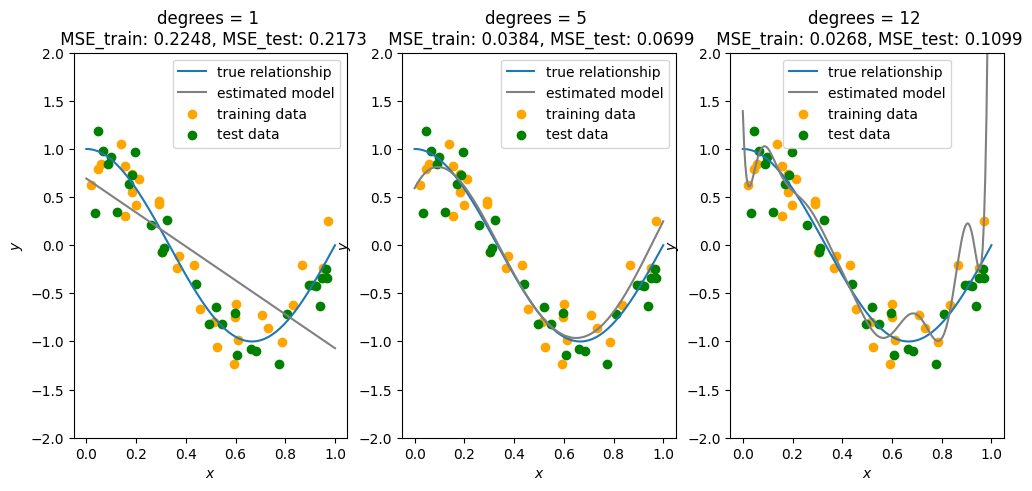

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


def plot_poly_regression(degrees, sklearn_linear_model, main_title, ax = None):
    if ax == None:
        ax = plt.gca()

    polynomial_features = PolynomialFeatures(degree=degrees, include_bias=False)
    X_poly = polynomial_features.fit_transform(X_train.reshape(-1, 1))
    regression_model = sklearn_linear_model
    regression_model.fit(X_poly, y_train)

    ax.plot(X_range, true_fun(X_range), label = 'true relationship')
    ax.plot(X_range, regression_model.predict(polynomial_features.transform(X_range.reshape(-1, 1))), label = 'estimated model', color = 'grey')
    ax.scatter(X_train, y_train, label = 'training data', color = 'orange')
    ax.scatter(X_test, y_test, label = 'test data', color = 'green')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_ylim(-2, 2)
    ax.legend()
    mse_train = mean_squared_error(y_train, regression_model.predict(polynomial_features.transform(X_train.reshape(-1, 1))))
    mse_test = mean_squared_error(y_test, regression_model.predict(polynomial_features.transform(X_test.reshape(-1, 1))))
    ax.set_title(f'{main_title} \n MSE_train: {mse_train:.4f}, MSE_test: {mse_test:.4f}')

    return ax

fig, axs = plt.subplots(1, 3, figsize = (12, 5))
plot_poly_regression(1, LinearRegression(), main_title = f'degrees = {1}', ax = axs[0])
plot_poly_regression(5, LinearRegression(), main_title = f'degrees = {5}', ax = axs[1])
plot_poly_regression(12,LinearRegression(), main_title = f'degrees = {12}', ax = axs[2])
plt.show()

## Bias-Variance Trade-Off

Der Bias-Variance Trade-Off zerlegt die erwartete Abweichung zwischen Prognose und tatsächlicher Realisierung eines Datenpunktes $(\boldsymbol{x}, y)$ in seine einzelnen Bestandteile:

$$
E \left(y - \hat{f} \left( \boldsymbol{x} \right) \right)^2 = Var\left(\hat{f} \left( \boldsymbol{x} \right)\right) + \left[ Bias\left(\hat{f} \left( \boldsymbol{x} \right)\right)\right]^2 + Var\left(\epsilon\right)
$$

Zufällige Abweichung zwischen Realisierungen und Prognosen eines Modells lassen sich nicht durch die Wahl des passenden Modells oder durch die perfekte Schätzung der Parameter reduzieren. Der Beitrag dieser Abweichungen ist durch $Var\left(\epsilon\right)$ gegeben. Dies bedeutet selbst wenn man den wahren Zusammenhang und die Parameter des Modells kennt, treten bedingt durch die Zufälligkeit immer Abweichungen der Realisierungen vom deterministischen Zusammenhang auf. In der Realität ist jedoch weder das passende Modell noch seine Parameter bekannt. Wenn ein Modell für unterschiedliche Stichproben geschätzt wird, resultieren jedes Mal unterschiedliche Parameterschätzungen und Prognosen $\hat{f} \left( \boldsymbol{x} \right)$. Dies beeinflusst die Abweichung zwischen tatsächlicher Realisierung und Prognose und ist durch $Var\left(\hat{f} \left( \boldsymbol{x} \right)\right)$ quantifiziert. Dies bedeutet, bedingt durch die Varianz sind die Prognosen mit dem geschätzten Modell je nach Stichprobe mal weiter und mal weniger weit vom wahren Zusammenhang $f \left( \boldsymbol{x} \right)$ entfernt. Insofern sich diese Abweichungen im Mittelwert wieder ausgleichen und im Mittelwert die Prognosen der geschätzten Modelle der Prognose des wahren Modelle entspricht, kommt es zu keinen systematischen Abweichungen zwischen $\hat{f} \left( \boldsymbol{x} \right)$ und $f \left( \boldsymbol{x} \right)$. In diesem Fall spricht man von einem unverzerrten Schätzer, für die der Bias gleich $0$ ist. Kommt es jedoch im Erwartungswert zu systematischen Abweichungen zwischen der Prognose des geschätzten Modells und dem tatsächlichen Zusammenhang, so ist der Bias von $0$ verschieden und eine weiter Quelle für die Abweichungen zwischen Prognose und tatsächlicher Realisierung des Modells. Wir fassen zusammen, Abweichungen entstehen haben folgende mögliche Ursachen:

- die Zufälligkeit der Realisierung: $\epsilon = y - f\left( \boldsymbol{x} \right)$
- die Varianz des geschätzten Modells für verschiedene Stichproben $Var\left(\hat{f} \left( \boldsymbol{x} \right)\right)$
- die systematische Abweichung des geschätzten Modells und dem wahren Zusammenhang, dem $Bias$: $E \left(\hat{f} \left( \boldsymbol{x} \right)  - f \left( \boldsymbol{x} \right)  \right)$

Da wir den wahren Zusammenhang $f \left( \boldsymbol{x} \right) $ in der Realität nicht kennen, ist es normalerweise auch nicht möglich, diese Komponenten einzeln zu bestimmen. Dennoch ist es wichtig die genannten Ursachen für die Abweichung zwischen Realisierung und Prognose zu verstehen, da Bias und Varianz eines Modells durch die Komplexität beeinflusst werden können. Komplexe Modelle weisen oft einen tendenziell kleineren Bias auf, bringen jedoch eine höhere Varianz mit sich. Entsprechend muss dies bei der Modellwahl wohl mit berücksichtigt werden, um am Ende ein Modell zu wählen und zu trainieren, welches beide Fehlerquellen möglichst gering hält